In [125]:
#homework 4 PyBer - import library 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [126]:
#read csv file
city = "raw_data/city_data.csv"
ride = "raw_data/ride_data.csv"


In [127]:
# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
ride_df = pd.read_csv(ride, encoding = "ISO-8859-1")
ride_df= ride_df.drop_duplicates()
ride_df.head()


,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [128]:
# read the second csv file

city_df = pd.read_csv(city, encoding = "ISO-8859-1")
city_df = city_df.drop_duplicates()
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


#Read the seond csv file
city_df = pd.read_csv(city, encoding = "ISO-8859-1")
city_df.head()



In [129]:
#join two data tables into one by city
sum_df = pd.merge(city_df, ride_df, on='city')
sum_df = sum_df.drop_duplicates()
sum_df.head()


,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [130]:
# * Average Fare ($) Per City 
avg_ride = sum_df.groupby('city')['fare'].mean()
avg_ride.head()

city
Alvarezhaven    23.928710
Alyssaberg      20.609615
Anitamouth      37.315556
Antoniomouth    23.625000
Aprilchester    21.981579
Name: fare, dtype: float64

In [131]:
avg_ride_df= pd.DataFrame(avg_ride)
avg_ride_df.rename(columns={'city': 'city', 'fare': 'Avg_Fare'}, inplace=True)
avg_ride_df.reset_index(level=0, inplace=True)
avg_ride_df.head()

,city,Avg_Fare
0,Alvarezhaven,23.928710
1,Alyssaberg,20.609615
2,Anitamouth,37.315556
3,Antoniomouth,23.625000
4,Aprilchester,21.981579


In [132]:
#* Total Number of Rides Per City
Total_rides = sum_df.groupby('city').ride_id.count()

Total_rides.head()


city
Alvarezhaven    31
Alyssaberg      26
Anitamouth       9
Antoniomouth    22
Aprilchester    19
Name: ride_id, dtype: int64

In [133]:
Total_rides_df= pd.DataFrame(Total_rides)
Total_rides_df.rename(columns={'city': 'city', 'ride_id': 'Total_ride'}, inplace=True)
Total_rides_df.reset_index(level=0, inplace=True)
Total_rides_df.head()

,city,Total_ride
0,Alvarezhaven,31
1,Alyssaberg,26
2,Anitamouth,9
3,Antoniomouth,22
4,Aprilchester,19


In [134]:
#* Total Number of Drivers Per City
num_driver = city_df.groupby('city').driver_count.sum()
num_driver.head()


city
Alvarezhaven    21
Alyssaberg      67
Anitamouth      16
Antoniomouth    21
Aprilchester    49
Name: driver_count, dtype: int64

In [135]:
num_driver_df= pd.DataFrame(num_driver)
num_driver_df.rename(columns={'city': 'city', 'driver_count': 'Total_driver'}, inplace=True)
num_driver_df.reset_index(level=0, inplace=True)
num_driver_df.head()

,city,Total_driver
0,Alvarezhaven,21
1,Alyssaberg,67
2,Anitamouth,16
3,Antoniomouth,21
4,Aprilchester,49


In [136]:
#* City Type (Urban, Suburban, Rural)
city_type = city_df[["city","type"]]
city_type.head()

                    

,city,type
0,Kelseyland,Urban
1,Nguyenbury,Urban
2,East Douglas,Urban
3,West Dawnfurt,Urban
4,Rodriguezburgh,Urban


In [137]:
# fin_df = avg_ride_df.join(Total_rides_df, on = ['city'], how = 'inner')

fin_df = pd.merge(avg_ride_df, Total_rides_df, on='city')
fin_df = pd.merge(fin_df, num_driver_df, on='city')
fin_df = pd.merge(fin_df, city_type, on='city')
fin_df.head()


,city,Avg_Fare,Total_ride,Total_driver,type
0,Alvarezhaven,23.928710,31,21,Urban
1,Alyssaberg,20.609615,26,67,Urban
2,Anitamouth,37.315556,9,16,Suburban
3,Antoniomouth,23.625000,22,21,Urban
4,Aprilchester,21.981579,19,49,Urban


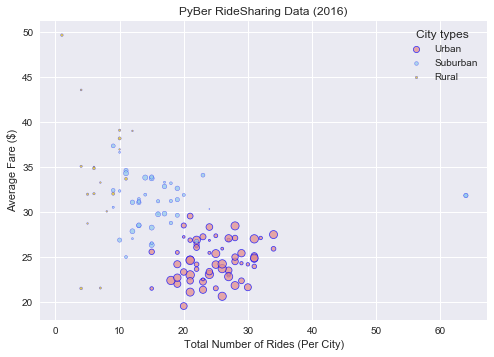

In [138]:
#plot the following variables:

# x axis = number of ride per city
# y axis = average fair per city
# color = city type per city
# s = diver count per city

colors = ["LightCoral", "LightSkyBlue", "Gold"]
sns.set_palette(colors,3,0.75)


#plot data for urban city type
urban = fin_df.loc[fin_df['type'] == "Urban"]
urbanplt = plt.scatter(urban["Total_ride"], urban["Avg_Fare"], marker="o", s=urban["Total_driver"], label='Urban',edgecolor = "b", linewidths=0.75,alpha=0.75)

# plot data for Suburban city type
Suburban = fin_df.loc[fin_df['type'] == "Suburban"]
suburbanplt= plt.scatter(Suburban["Total_ride"], Suburban["Avg_Fare"], marker="o", s=Suburban["Total_driver"],label='Suburban', edgecolor = "b",alpha=0.75)

# plot data for Rural city type
Rural = fin_df.loc[fin_df['type'] == "Rural"]
ruralplt = plt.scatter(Rural["Total_ride"], Rural["Avg_Fare"], marker="o", s=Rural["Total_driver"],label='Rural', edgecolor = "b",alpha=0.75)

#titles,lables, and legends
plt.title("PyBer RideSharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

plt.legend(handles = [urbanplt, suburbanplt, ruralplt],title="City types", loc = "upper right")

# Show plot
plt.show()


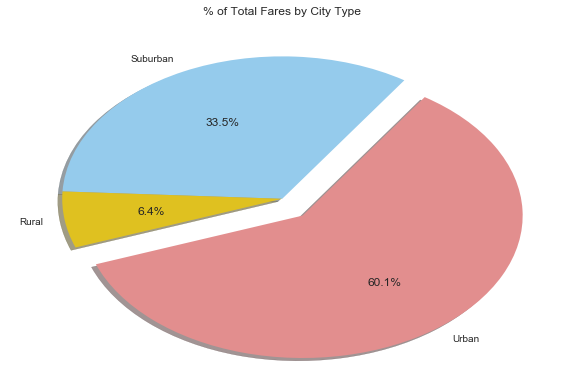

In [139]:
# In addition, you will be expected to produce the following three pie charts:
# * % of Total Fares by City Type

#Create a new column to define the fare per city
fin_df["fare_per_city"]=""
for index, row in fin_df.iterrows():
     fin_df.set_value(index, "fare_per_city", row["Avg_Fare"]* row["Total_ride"])
        
#define the total fare for each city type

urban_fare = fin_df.loc[fin_df['type'] == "Urban"]
urban_fare_total = round(urban_fare["fare_per_city"].sum(),2)

Suburban_fare = fin_df.loc[fin_df['type'] == "Suburban"]
Suburban_fare_total = round(Suburban_fare["fare_per_city"].sum(),2)

Rural_fare = fin_df.loc[fin_df['type'] == "Rural"]
Rural_fare_total = round(Rural_fare["fare_per_city"].sum(),2)

#create a new dataframe to store the total fare per type
new_data = {"type":["Urban","Suburban", "Rural"], "total_fare":[urban_fare_total,Suburban_fare_total,Rural_fare_total]}
avg_fare=pd.DataFrame(new_data)

# plot pie chart
plt.pie(avg_fare["total_fare"], labels=avg_fare["type"], shadow=True,explode=(0.15, 0, 0),startangle=200, autopct='%1.1f%%')
plt.title("% of Total Fares by City Type")
plt.tight_layout()
plt.show()


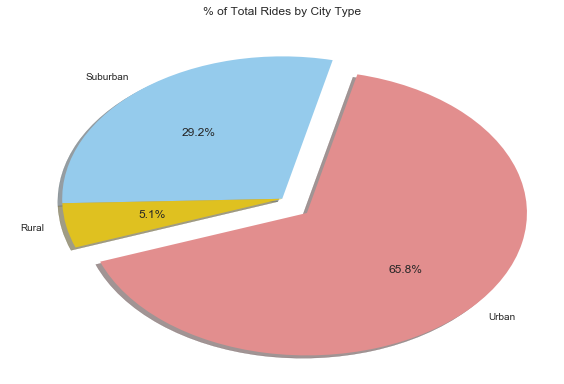

In [140]:
# * % of Total Rides by City Type
        
#define the total ride for each city type

urban_total_ride = round(urban_fare["Total_ride"].sum(),2)
Suburban_total_ride = round(Suburban_fare["Total_ride"].sum(),2)
Rural_total_ride = round(Rural_fare["Total_ride"].sum(),2)

#create a new dataframe to store the total fare per city type
new_data = {"type":["Urban","Suburban", "Rural"], "total_rides":[urban_total_ride,Suburban_total_ride,Rural_total_ride]}
ride=pd.DataFrame(new_data)

# plot pie chart
plt.pie(ride["total_rides"], labels=ride["type"], shadow=True,explode=(0.15, 0, 0),startangle=200, autopct='%1.1f%%')
plt.title("% of Total Rides by City Type")
plt.tight_layout()
plt.show()


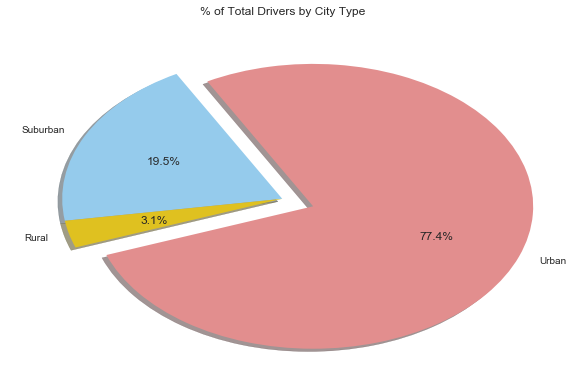

In [141]:
# * % of Total Drivers by City Type

#define the total driver for each city type

urban_driver = urban_fare["Total_driver"].sum()
Suburban_driver = Suburban_fare["Total_driver"].sum()
Rural_driver = Rural_fare["Total_driver"].sum()

#create a new dataframe to store the total fare per city type
new_data = {"type":["Urban","Suburban", "Rural"], "total_drivers":[urban_driver,Suburban_driver,Rural_driver]}
driver=pd.DataFrame(new_data)

# plot pie chart
plt.pie(driver["total_drivers"], labels=driver["type"], shadow=True,explode=(0.15, 0, 0),startangle=200, autopct='%1.1f%%')
plt.title("% of Total Drivers by City Type")
plt.tight_layout()
plt.show()



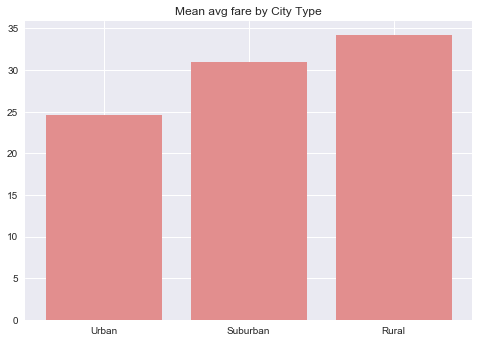

In [142]:
# Extra plot to validate the assumptions in the observation


#define the avg fare for each city type

urban_avg_fare = round(urban_fare["Avg_Fare"].mean(),2)
Suburban_avg_fare = round(Suburban_fare["Avg_Fare"].mean(),2)
Rural_avg_fare = round(Rural_fare["Avg_Fare"].mean(),2)

#create a new dataframe to store the total fare per type
# new_data2 = {"type":["Urban","Suburban", "Rural"], "avg_fare":[urban_avg_fare,Suburban_avg_fare,Rural_avg_fare]}
# avg_fare=pd.DataFrame(new_data2)
# avg_fare.head()

# x axis = number of ride per city
# y axis = average fair per city
# color = city type per city
# s = diver count per city

# plot bar chart
value={"Urban":urban_avg_fare,"Suburban":Suburban_avg_fare, "Rural":Rural_avg_fare}
plt.bar(range(len(value)),value.values(),align = "center")
labels = ["Urban", "Suburban", "Rural"]
plt.xticks(range(len(value)), labels)
plt.title("Mean avg fare by City Type")
plt.show()
